In [4]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [5]:
# creating dataframes from results files
df_heuristic = pd.read_csv('./results/new_results_heuristic.csv', index_col='Unnamed: 0')
df_RL_TF_5 = pd.read_csv('./results/updated_results_RL_TL_5.csv', index_col='Unnamed: 0')
df_RL_TF_10 = pd.read_csv('./results/updated_results_RL_TL_10.csv', index_col='Unnamed: 0')
df_RL_TF_15 = pd.read_csv('./results/updated_results_RL_TL_15.csv', index_col='Unnamed: 0')

In [44]:
# combining all datasets and meaning

df = pd.concat([df_heuristic, df_RL_TF_5, df_RL_TF_10, df_RL_TF_15], axis = 1, keys=('heuristic', 'TF_5', 'TF_10', 'TF_15'))
for agent in ['TF_5', 'TF_10', 'TF_15']:
    df[(agent, 'no_reason')] = 1 - (df[(agent, 'blocked_continuous')] + df[(agent, 'blocked_contiguous')])
    df[(agent, 'contiguous_normalised')] = df[(agent, 'blocked_contiguous')].divide(1-df[(agent, 'no_reason')])
    df[(agent, 'continuous_normalised')] = df[(agent, 'blocked_continuous')].divide(1-df[(agent, 'no_reason')])
df[('heuristic', 'no_reason')] = pd.Series(np.zeros(df[('heuristic', 'bp')].shape[0]))
df = df.fillna(0)
df_meaned = df.groupby(('heuristic' ,'traffic_load')).mean()
# for agent in ['TF_5', 'TF_10', 'TF_15']:
    

In [46]:
df_meaned

heuristic                                \
                                 bp avg_length blocked_continuous   
(heuristic, traffic_load)                                           
5.0                        0.000000   1.430000           0.000000   
5.5                        0.000000   1.430000           0.000000   
6.0                        0.000000   1.425000           0.000000   
6.5                        0.000000   1.425000           0.000000   
7.0                        0.000000   1.425000           0.000000   
7.5                        0.000000   1.425000           0.000000   
8.0                        0.000000   1.425000           0.000000   
8.5                        0.000000   1.425000           0.000000   
9.0                        0.000000   1.443333           0.000000   
9.5                        0.028333   1.433772           0.000000   
10.0                       0.041667   1.434737           0.000000   
10.5                       0.060000   1.434795           0.000000   
11.0                       0.060000   1.436647           0.000000   
11.5                       0.061667   1.435667           0.000000   
12.0                       0.071667   1.447753           0.000000   
12.5                       0.095000   1.433035           0.233333   
13.0                       0.080000   1.449891           0.050000   
13.5                       0.105000   1.441753           0.038889   
14.0                       0.105000   1.441753           0.038889   
14.5                       0.130000   1.425912           0.033333   
15.0                       0.130000   1.425912           0.033333   
15.5                       0.130000   1.425912           0.033333   
16.0                       0.130000   1.425912           0.033333   
16.5                       0.150000   1.411955           0.163889   
17.0                       0.150000   1.411955           0.163889   
17.5                       0.150000   1.411955           0.163889   
18.0                       0.150000   1.411955           0.163889   
18.5                       0.150000   1.411955           0.163889   
19.0                       0.150000   1.433647           0.163889   
19.5                       0.155000   1.436220           0.180556   
20.0                       0.155000   1.436220           0.180556   

                                                  TF_5             \
                          blocked_contiguous        bp avg_length   
(heuristic, traffic_load)                                           
5.0                                 0.000000  0.135000   3.742478   
5.5                                 0.000000  0.136667   3.640329   
6.0                                 0.000000  0.130000   3.653771   
6.5                                 0.000000  0.155000   3.769544   
7.0                                 0.000000  0.135000   3.706462   
7.5                                 0.000000  0.150000   3.710054   
8.0                                 0.000000  0.156667   3.805360   
8.5                                 0.000000  0.171667   3.828475   
9.0                                 0.000000  0.160000   3.792089   
9.5                                 0.566667  0.200000   3.931995   
10.0                                0.833333  0.200000   3.930780   
10.5                                1.000000  0.226667   4.043582   
11.0                                1.000000  0.225000   4.068098   
11.5                                1.000000  0.255000   4.179513   
12.0                                1.000000  0.253333   4.186836   
12.5                                0.766667  0.281667   4.336693   
13.0                                0.950000  0.283333   4.370151   
13.5                                0.961111  0.311667   4.434425   
14.0                                0.961111  0.306667   4.411868   
14.5                                0.966667  0.328333   4.552026   
15.0                                0.966667  0.325000   4.546871   
15.5                   

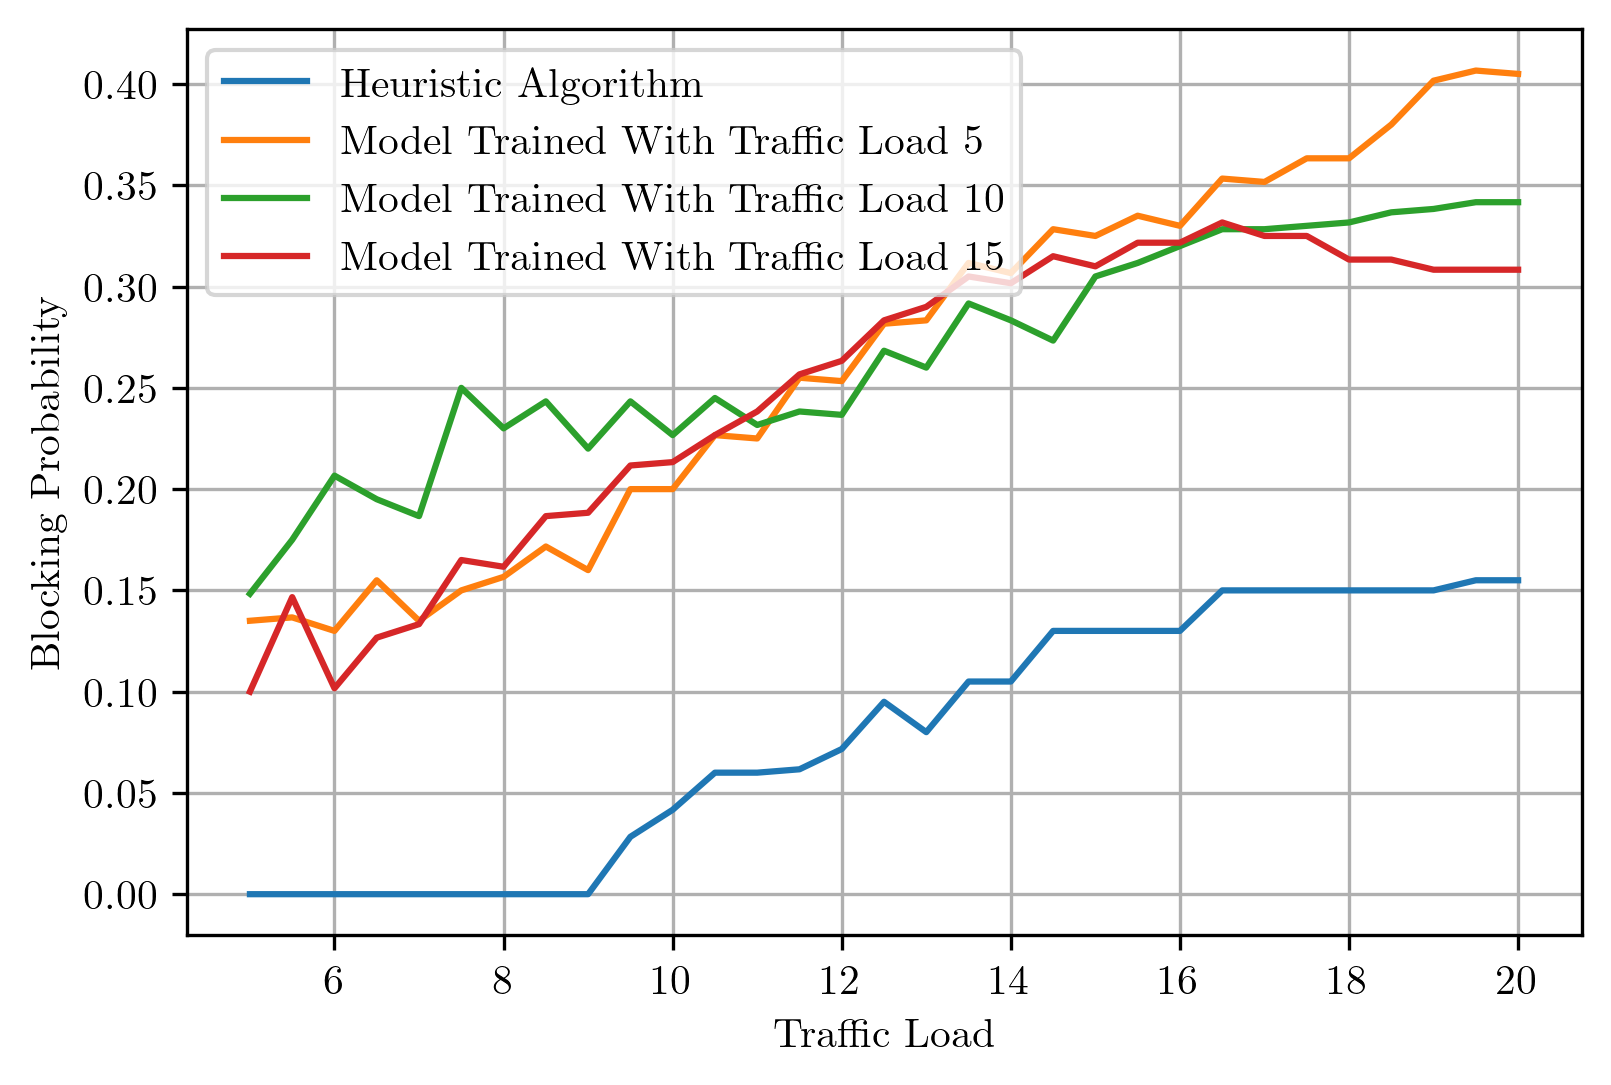

In [7]:
# blocking probability vs traffic load

fig, ax = plt.subplots(dpi=300)
df_meaned.plot(
    y=[('heuristic', 'bp'), ('TF_5', 'bp'), ('TF_10', 'bp'), ('TF_15', 'bp')],
    ax = ax,
    grid=True
)
ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_ylabel('Blocking Probability')
ax.set_xlabel('Traffic Load')
# plt.show()
plt.savefig('./figures/bp_vs_traffic_load.pgf', format='pgf')

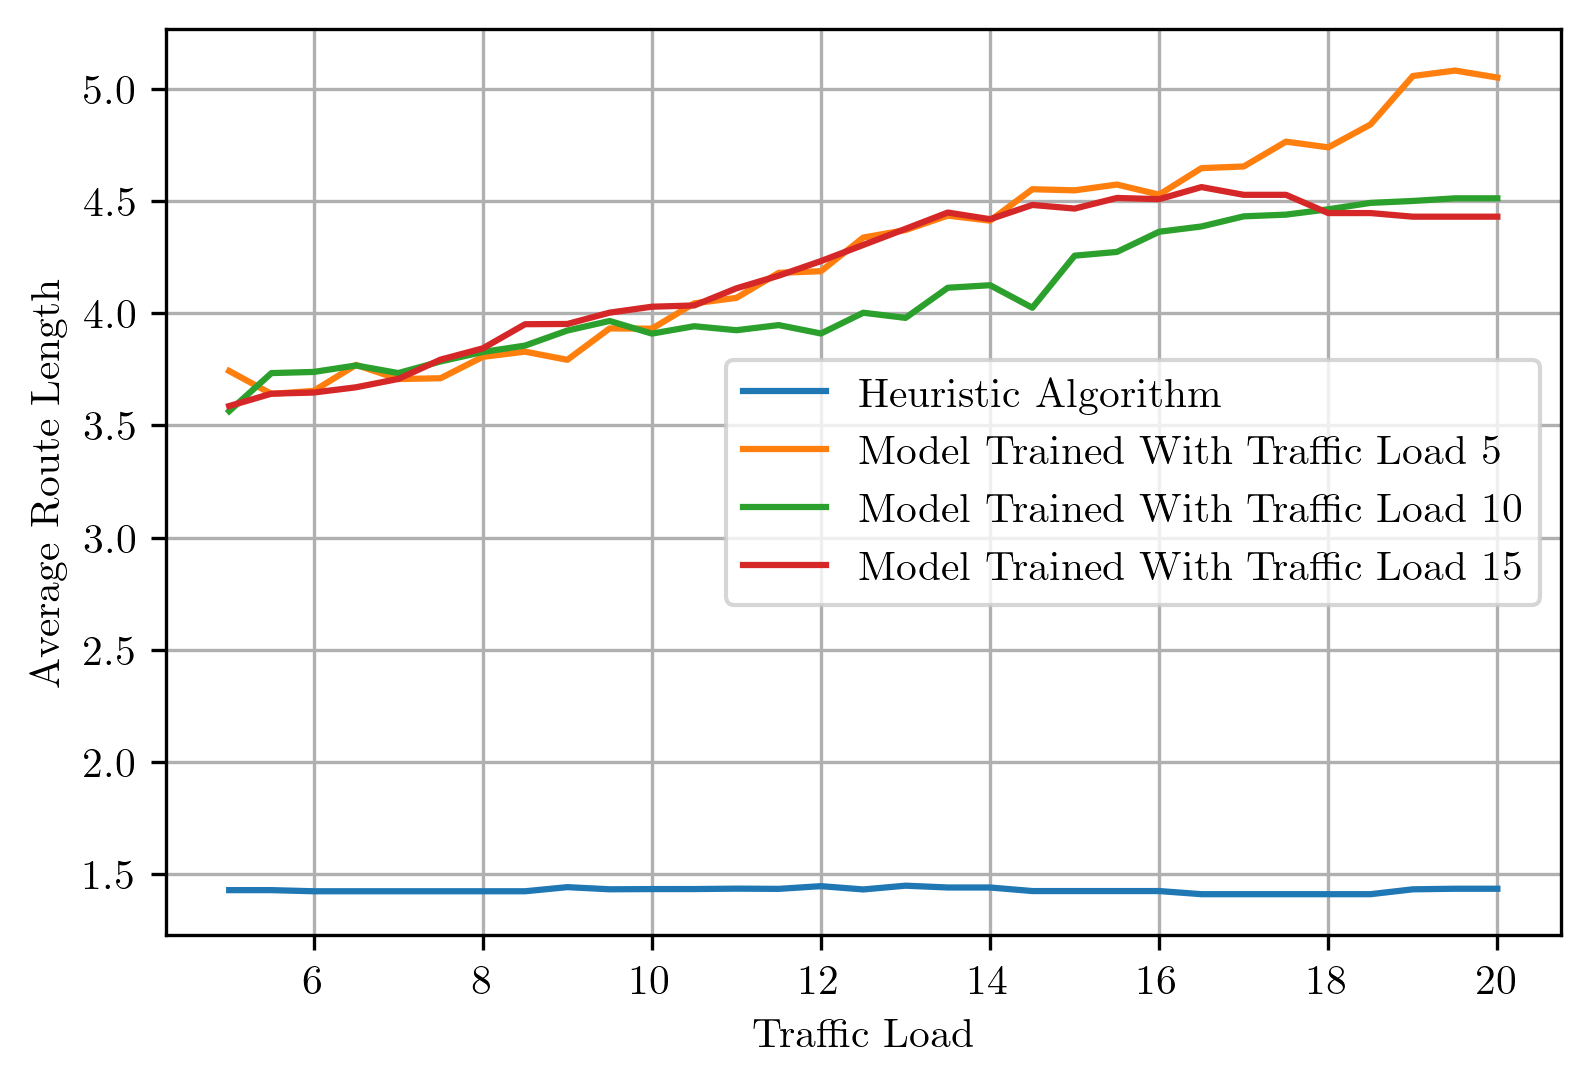

In [9]:
# route length vs traffic load

fig, ax = plt.subplots(dpi=300)
df_meaned.plot(
    y=[('heuristic', 'avg_length'), ('TF_5', 'avg_length'), ('TF_10', 'avg_length'), ('TF_15', 'avg_length')],
    ax = ax,
    grid=True
)
ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_ylabel('Average Route Length')
ax.set_xlabel('Traffic Load')
# plt.show()
plt.savefig('./figures/length_vs_traffic_load.pgf', format='pgf')

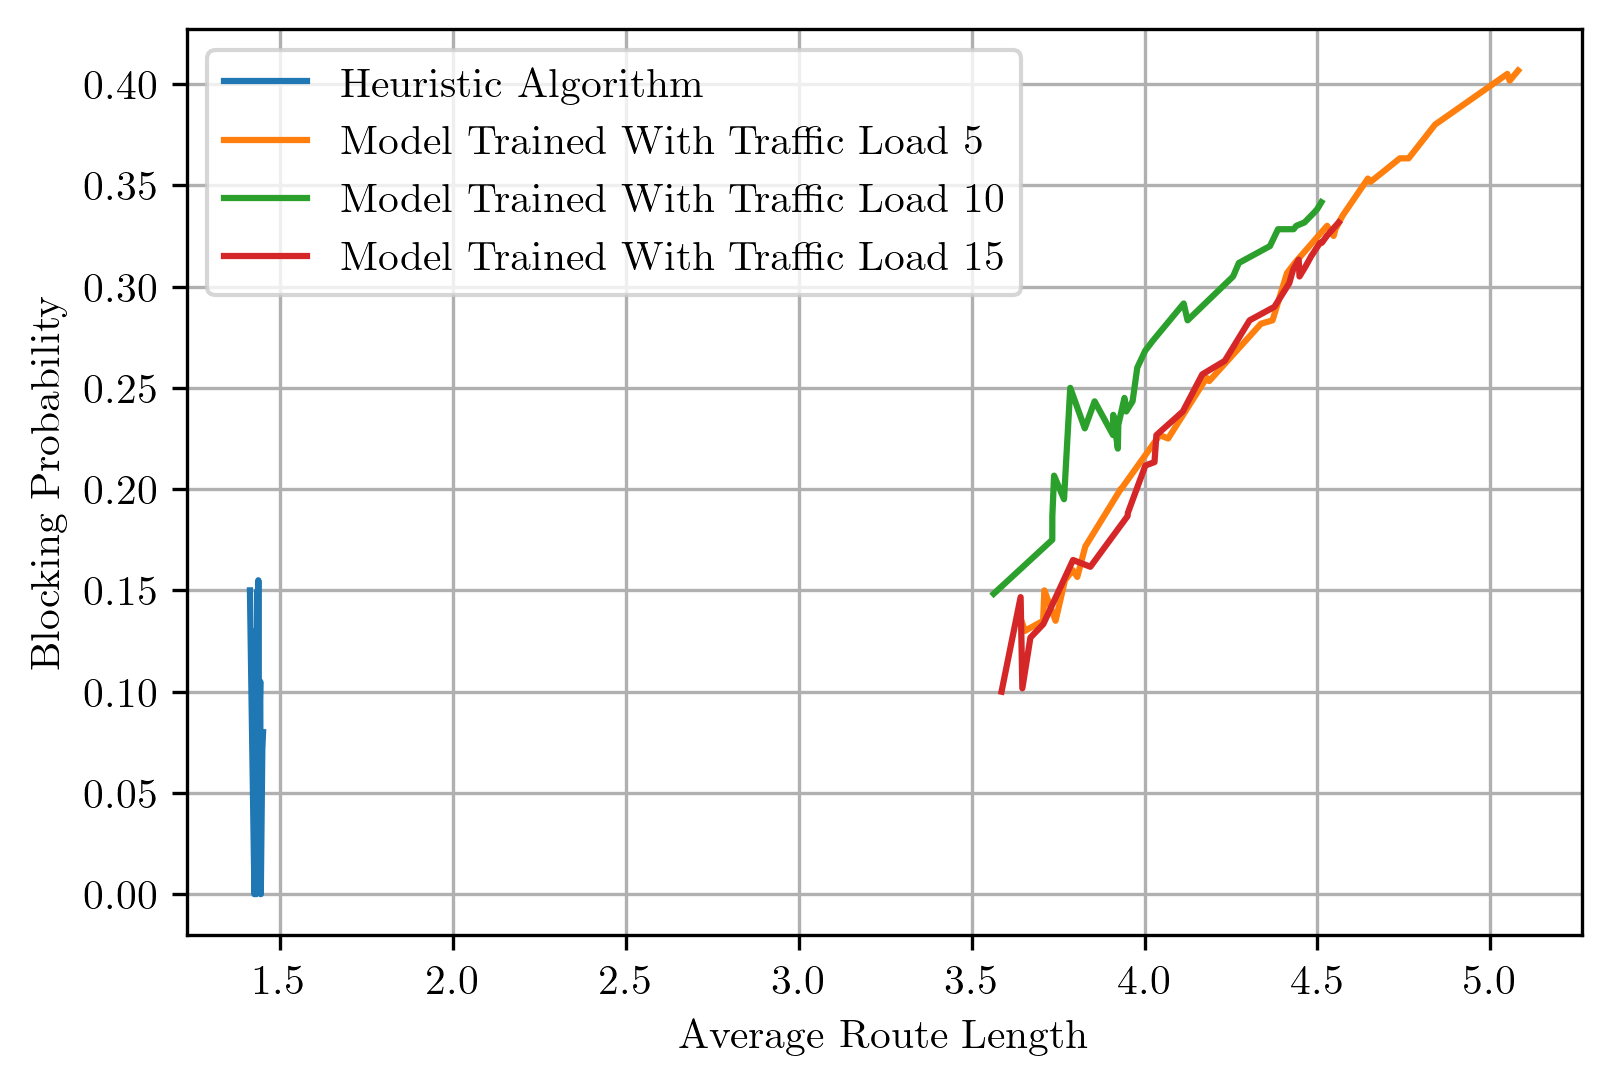

In [10]:
# route length vs blocking probability

fig, ax = plt.subplots(dpi=300)

agents = ['heuristic', 'TF_5', 'TF_10', 'TF_15']
for i in range(len(agents)):
    df_plot = df_meaned[[(agents[i], 'avg_length'), (agents[i], 'bp')]].sort_values(by=(agents[i], 'avg_length'))
    df_plot.plot(
        x=(agents[i], 'avg_length'),
        y=(agents[i], 'bp'),
        ax = ax,
        grid=True,
    )

ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_ylabel('Blocking Probability')
ax.set_xlabel('Average Route Length')
# plt.show()
plt.savefig('./figures/length_vs_bp.pgf', format='pgf')


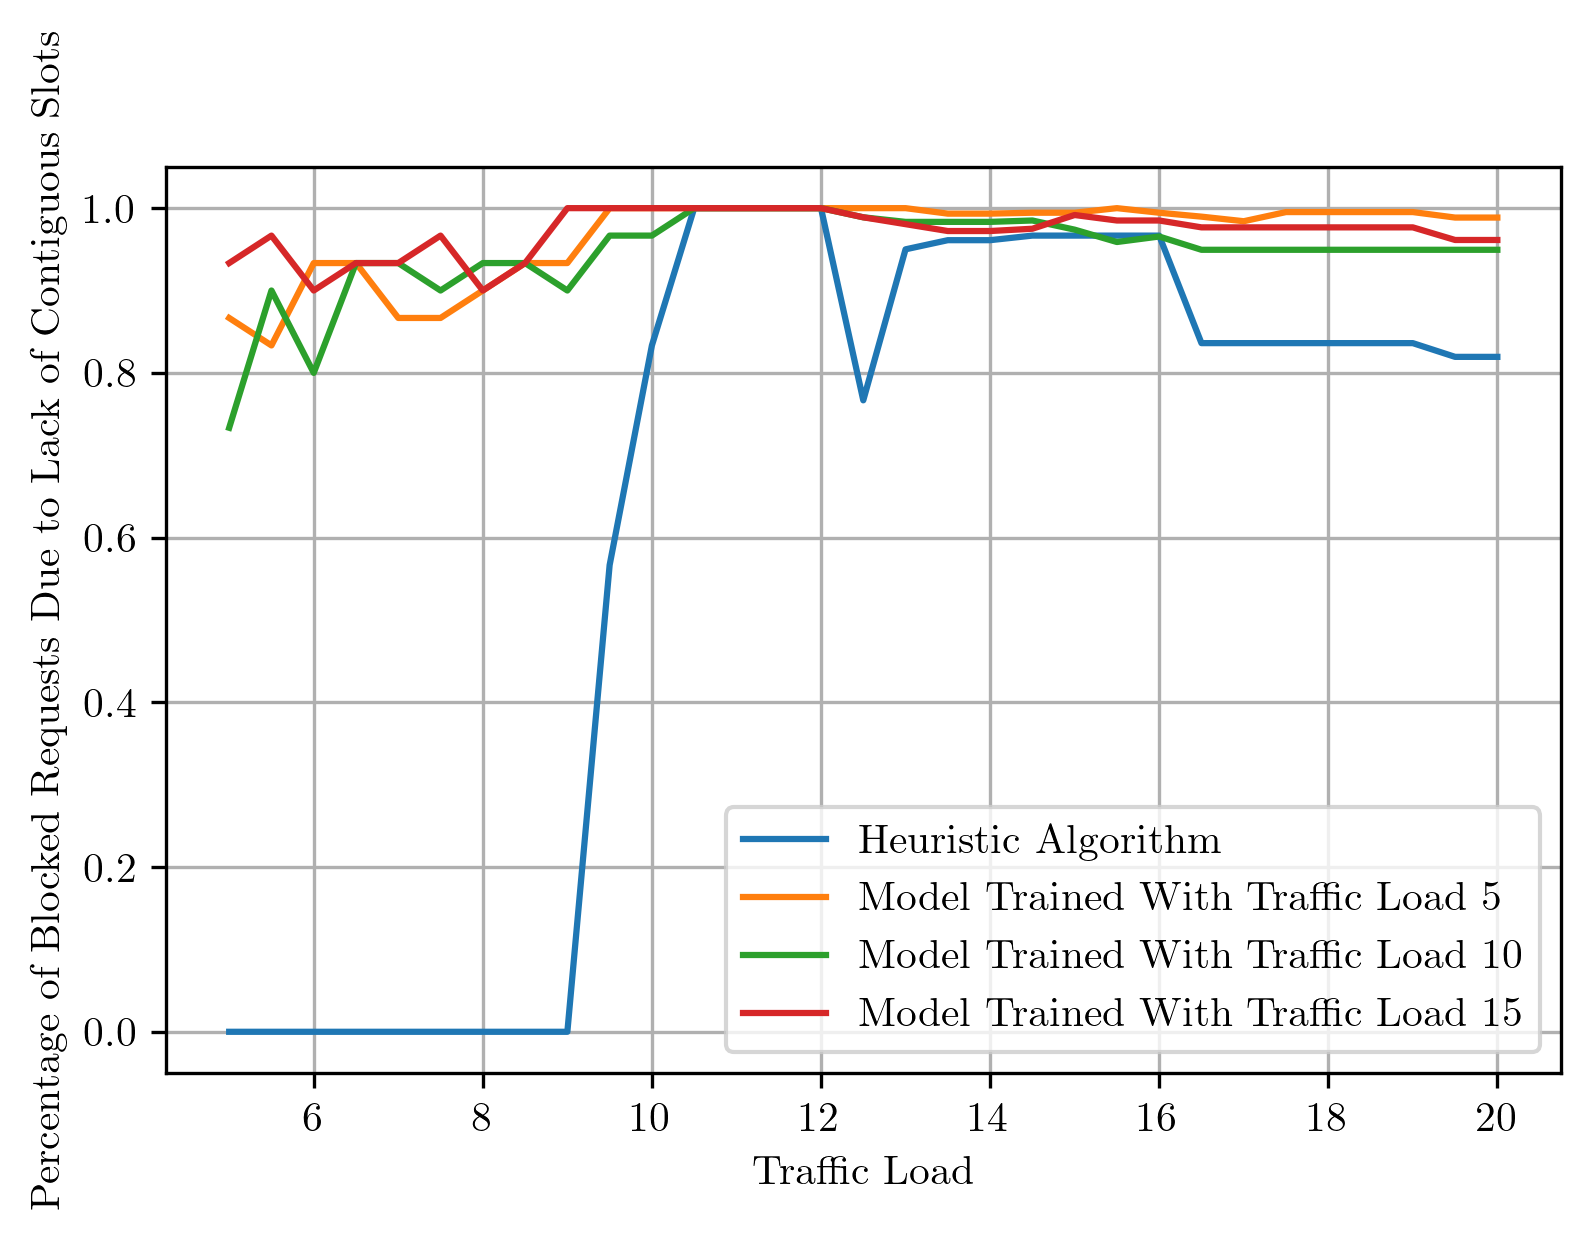

In [47]:
# contiguous blocking vs traffic load

fig, ax = plt.subplots(dpi=300)


df_meaned.plot(
    y=[('heuristic', 'blocked_contiguous'), ('TF_5', 'contiguous_normalised'), ('TF_10', 'contiguous_normalised'), ('TF_15', 'contiguous_normalised')],
    ax = ax,
    grid=True,
)

ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_xlabel('Traffic Load')
ax.set_ylabel('Percentage of Blocked Requests Due to Lack of Contiguous Slots')

# plt.show()
plt.savefig('./figures/bp_contiguous vs traffic load.pgf', format='pgf')

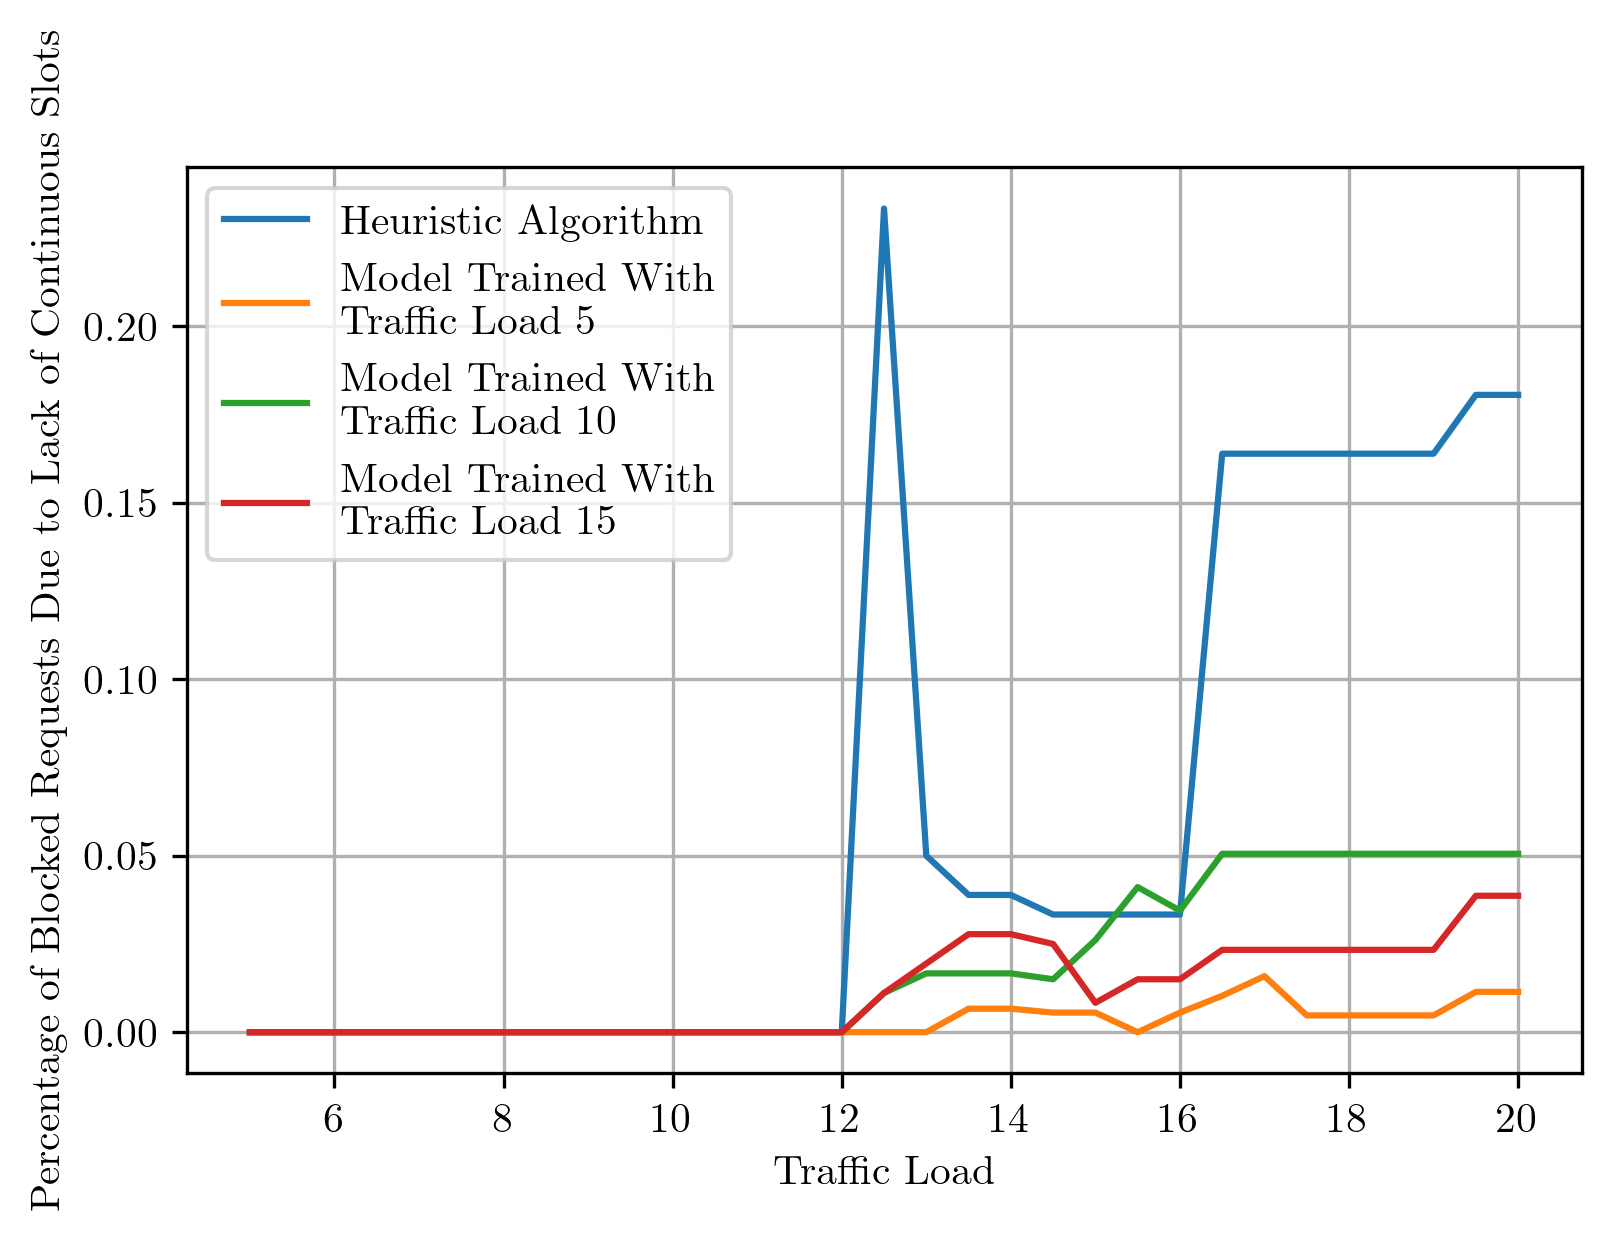

In [49]:
# continuous blocking vs traffic load

fig, ax = plt.subplots(dpi=300)


df_meaned.plot(
    y=[('heuristic', 'blocked_continuous'), ('TF_5', 'continuous_normalised'), ('TF_10', 'continuous_normalised'), ('TF_15', 'continuous_normalised')],
    ax = ax,
    grid=True,
)

ax.legend(['Heuristic Algorithm', 'Model Trained With \n Traffic Load 5', 'Model Trained With \n Traffic Load 10', 'Model Trained With \n Traffic Load 15'], loc='upper left')
ax.set_xlabel('Traffic Load')
ax.set_ylabel('Percentage of Blocked Requests Due to Lack of Continuous Slots')

# plt.show()
plt.savefig('./figures/bp_continuous vs traffic load.pgf', format='pgf')

In [13]:
# finding requests blocked for no reason
df_bp = pd.DataFrame()
agents = ['heuristic', 'TF_5', 'TF_10', 'TF_15']

for agent in agents:
    df_bp[agent] = df[(agent, 'no_reason')]

In [14]:
df_bp['traffic_load'] = df[('heuristic', 'traffic_load')]

In [15]:
df_bp = df_bp.groupby('traffic_load').mean()

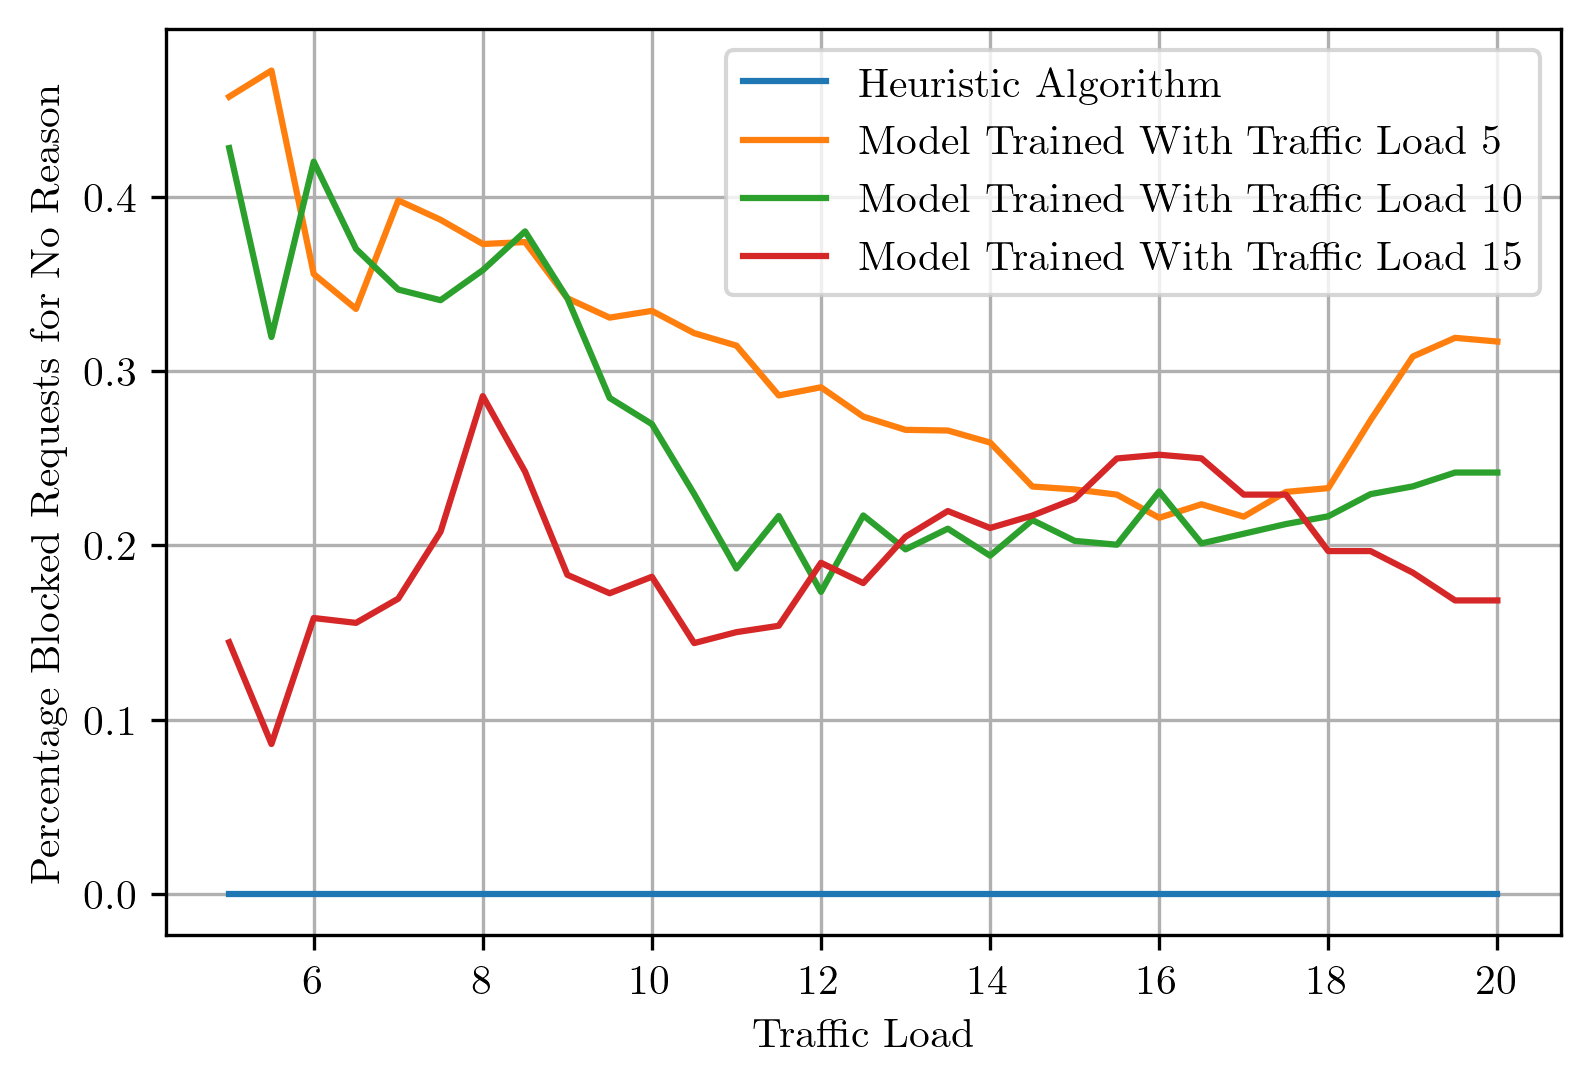

In [16]:
fig, ax = plt.subplots(dpi=300)


df_bp.plot(
    y=agents,
    ax = ax,
    grid=True,
)

ax.legend(['Heuristic Algorithm', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_xlabel('Traffic Load')
ax.set_ylabel('Percentage Blocked Requests for No Reason')

# plt.show()
plt.savefig('./figures/bp_no_reason vs traffic load.pgf', format='pgf')

In [17]:
df_5_new = pd.read_csv('./results/updated_results_RL_TL_5.csv')
df_5_new['no_reason'] = 1 - df_5_new['blocked_continuous'] - df_5_new['blocked_contiguous']

<AxesSubplot:xlabel='traffic_load'>

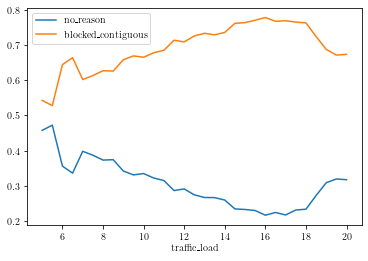

In [18]:
df_5_new.groupby('traffic_load').mean().plot(
    y=['no_reason', 'blocked_contiguous']
)

In [19]:
df_new_heuristic = pd.read_csv('results/new_results_heuristic.csv')

In [20]:
import numpy as np
df_heuristic_group = df_heuristic.loc[~(df==0.000000).all(axis=1)]
df_heuristic_group

,bp,avg_length,blocked_continuous,blocked_contiguous,traffic_load
0,0.00,1.450000,0.000000,0.000000,5.0
1,0.00,1.450000,0.000000,0.000000,5.0
2,0.00,1.450000,0.000000,0.000000,5.0
3,0.00,1.400000,0.000000,0.000000,5.0
4,0.00,1.450000,0.000000,0.000000,5.0
...,...,...,...,...,...
925,0.15,1.352941,0.333333,0.666667,20.0
926,0.15,1.470588,0.000000,1.000000,20.0
927,0.15,1.411765,0.333333,0.666667,20.0
928,0.15,1.352941,0.333333,0.666667,20.0


In [21]:
(df_new_heuristic['blocked_continuous'] + df_new_heuristic['blocked_contiguous']).unique()

array([0., 1.])

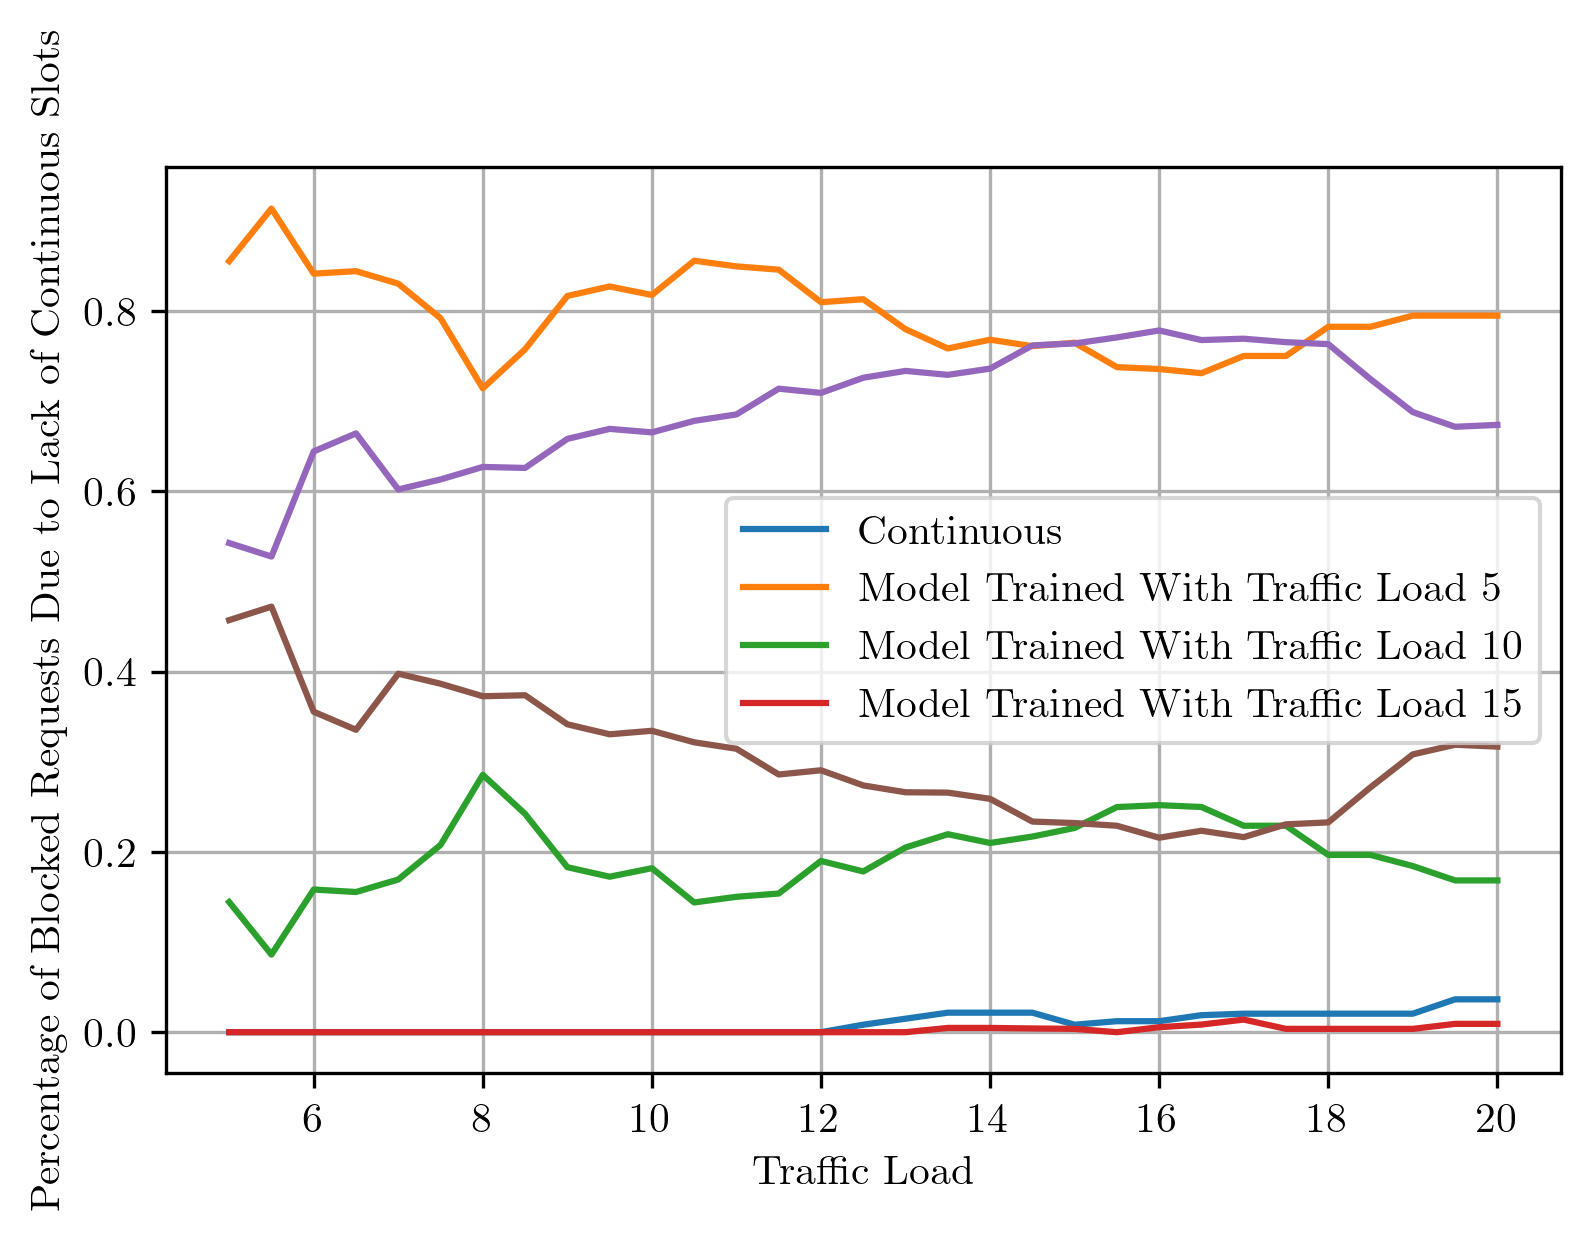

In [22]:
# continuous blocking vs traffic load

fig, ax = plt.subplots(dpi=300)


df_meaned.plot(
    y=[('TF_15', 'blocked_continuous'), ('TF_15', 'blocked_contiguous'), ('TF_15', 'no_reason'), ('TF_5', 'blocked_continuous'), ('TF_5', 'blocked_contiguous'), ('TF_5', 'no_reason')],
    ax = ax,
    grid=True,
)

ax.legend(['Continuous', 'Model Trained With Traffic Load 5', 'Model Trained With Traffic Load 10', 'Model Trained With Traffic Load 15'])
ax.set_xlabel('Traffic Load')
ax.set_ylabel('Percentage of Blocked Requests Due to Lack of Continuous Slots')

plt.show()
# plt.savefig('./figures/bp_continuous vs traffic load.pgf', format='pgf')

# New Requests

In [24]:
# creating dataframes from results files
df_heuristic = pd.read_csv('./results/new_results_heuristic.csv', index_col='Unnamed: 0')
df_RL_TF_5 = pd.read_csv('./results/updated_results_RL_TL_5.csv', index_col='Unnamed: 0')
df_RL_TF_10 = pd.read_csv('./results/updated_results_RL_TL_10.csv', index_col='Unnamed: 0')
df_RL_TF_15 = pd.read_csv('./results/updated_results_RL_TL_15.csv', index_col='Unnamed: 0')